3.Mall Customer Segmentation

Customer Segmentation Analysis with Python

Import Necessary Libraries

In [1]:
#Data Analysis Libraries
import numpy as np
import pandas as pd

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

Read in and Explore the data

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.describe(include = 'all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


Data Analysis

In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.rename(columns = {'CustomerID': 'Cid'}, inplace = True)

In [5]:
df.rename(columns = {'Annual Income (k$)': 'Income'}, inplace = True)

In [6]:
df.rename(columns = {'Spending Score (1-100)': 'Score'}, inplace = True)

In [7]:
df.columns

Index(['Cid', 'Gender', 'Age', 'Income', 'Score'], dtype='object')

In [8]:
df.head()

,Cid,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.sample(7)

,Cid,Gender,Age,Income,Score
184,185,Female,41,99,39
102,103,Male,67,62,59
136,137,Female,44,73,7
20,21,Male,35,24,35
57,58,Male,69,44,46
56,57,Female,51,44,50
146,147,Male,48,77,36


In [10]:
print(pd.isnull(df).sum())

Cid       0
Gender    0
Age       0
Income    0
Score     0
dtype: int64


Data Visualization

In [11]:
#Data Pre-processing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cid     200 non-null    int64 
 1   Gender  200 non-null    object
 2   Age     200 non-null    int64 
 3   Income  200 non-null    int64 
 4   Score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.describe(include = 'all')

,Cid,Gender,Age,Income,Score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [14]:
df.nunique()

Cid       200
Gender      2
Age        51
Income     64
Score      84
dtype: int64

In [15]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Number of Males and Females')

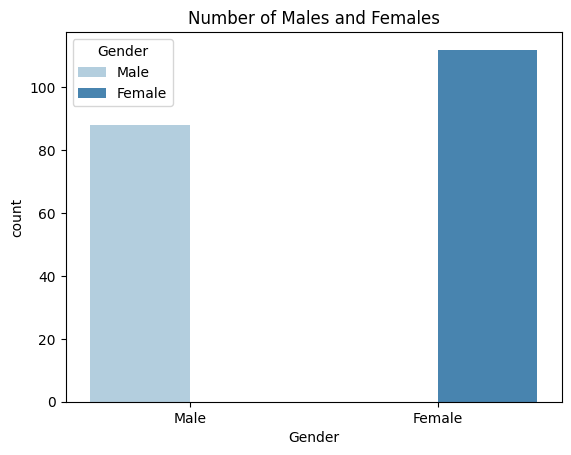

In [16]:
sea.countplot(x = 'Gender', data = df, hue = 'Gender', palette = 'Blues')
plt.title("Number of Males and Females")

Text(0.5, 1.0, 'Percentages of Male and Females')

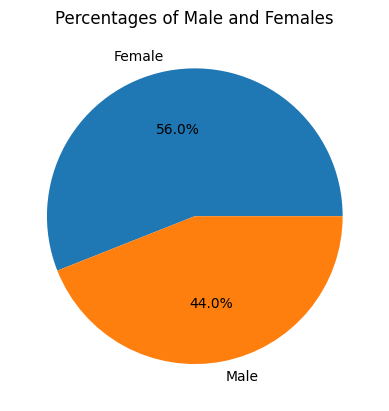

In [17]:
plt.pie(df.Gender.value_counts(), labels = ['Female', 'Male'], autopct = "%0.1f%%")
plt.title('Percentages of Male and Females' )

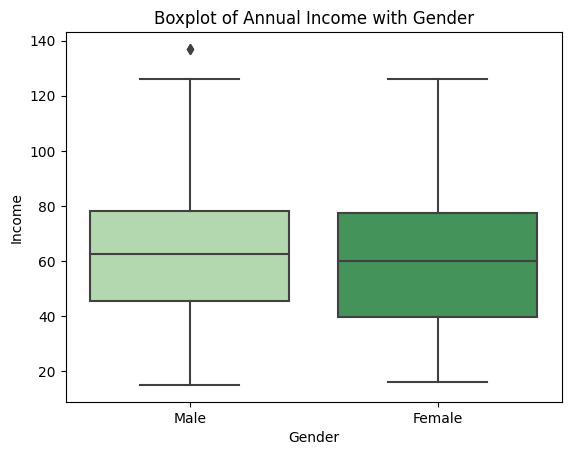

In [18]:
sea.boxplot(x = 'Gender', y = "Income", data = df, palette = 'Greens')
plt.title("Boxplot of Annual Income with Gender")
plt.show()

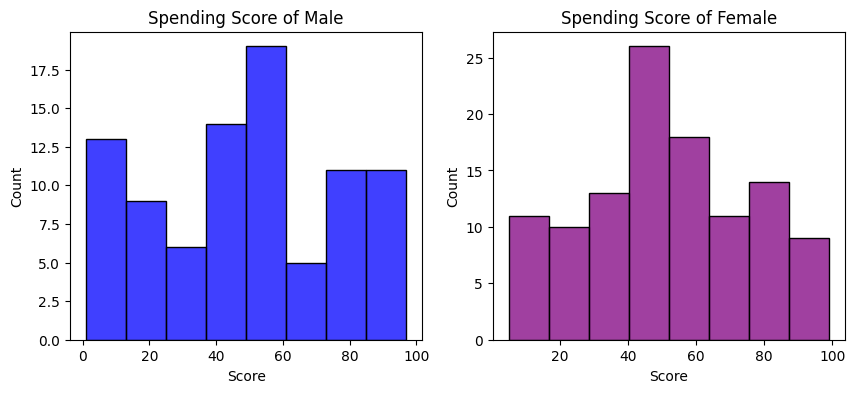

In [19]:
score_male = df[df.Gender == "Male"]["Score"]
score_female = df[df.Gender != "Male"]["Score"]

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sea.histplot(score_male, color = "blue")
plt.title("Spending Score of Male")

plt.subplot(1,2,2)
sea.histplot(score_female, color = 'purple')
plt.title("Spending Score of Female")
plt.show()

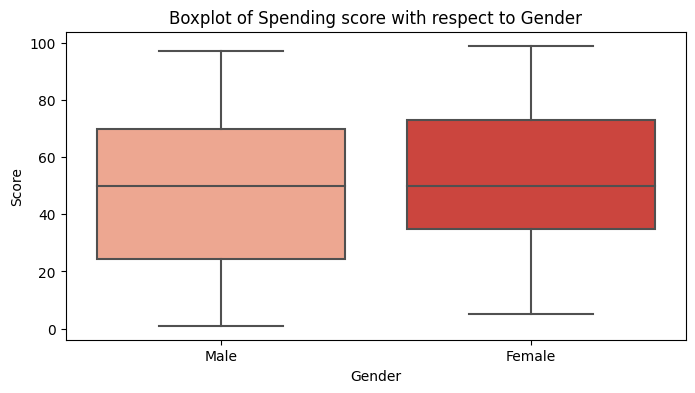

In [20]:
plt.figure(figsize = (8,4))

sea.boxplot(x = df.Gender, y = df.Score, palette = 'Reds')
plt.title('Boxplot of Spending score with respect to Gender')
plt.show()

In [35]:
#Data Transforming
from sklearn.preprocessing import LabelEncoder

df  = df.copy()
# Now we will perform LabelEncoding on the Gender column.
enc = LabelEncoder()
df['Gender'] = enc.fit_transform(df['Gender'])
df.head()

,Cid,Gender,Age,Income,Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Random Forest Algorithm

In [43]:
#Extracting independent and dependent variables
x = df.iloc[:, [1, 2, 3]].values
y = df.iloc[:, 4].values

In [44]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [45]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
y_pred = randomforest.predict(x_test)

In [47]:
print(x_test)
print(y_pred)

[[ 1 52 23]
 [ 1 40 87]
 [ 1 54 63]
 [ 1 48 61]
 [ 1 27 88]
 [ 1 46 98]
 [ 0 22 17]
 [ 1 48 77]
 [ 0 58 20]
 [ 0 44 78]
 [ 1 19 46]
 [ 0 31 70]
 [ 0 37 97]
 [ 0 47 78]
 [ 1 57 54]
 [ 0 23 18]
 [ 1 18 33]
 [ 1 47 71]
 [ 0 30 34]
 [ 1 59 54]
 [ 0 29 98]
 [ 1 28 77]
 [ 0 24 39]
 [ 0 30 78]
 [ 1 70 46]
 [ 1 39 69]
 [ 1 35 93]
 [ 1 30 99]
 [ 0 40 69]
 [ 0 49 39]]
[ 4 20 52 49 75 17 77 17 14 76 59 71 85 76 46 77 59 35 61 41 86 12 52 78
 46 75 10 68 40 52]


In [50]:
y_pred = randomforest.predict([[0, 21, 20]])

In [51]:
print(y_pred)

[77]
